In [1]:
! pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 1.4 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.6 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.6/38.6 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.1/38.6 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/38.6 MB 11.0 MB/s eta 0:00:04
   ----- ---------------------------------- 5.3/38.6 MB 14.7 MB/s eta 0:00:03
   -------- ------------------------------- 8.0/38.6 MB 19.6 MB/s eta 0:00:02
   --------

In [37]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(cv2.__version__)

4.9.0


In [46]:
train = np.loadtxt("D:/GITHUB/CV/Data/train.csv", delimiter=',', skiprows=1)
test = np.loadtxt("D:/GITHUB/CV/Data/test.csv", delimiter=',', skiprows=1)

In [47]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))


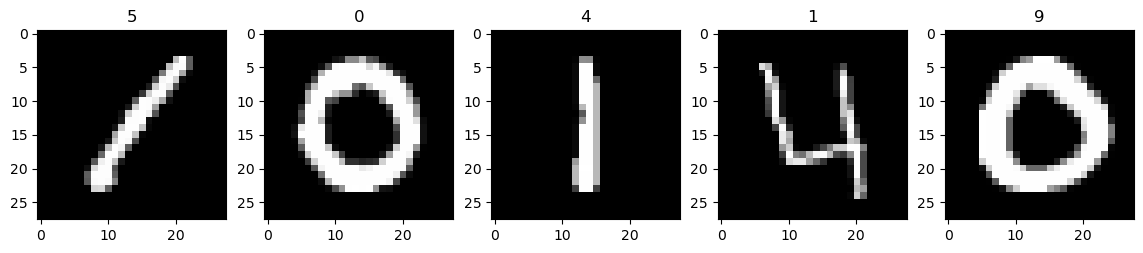

In [48]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_train[i - 1]);

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [49]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [50]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

### Вычисляем угол и длину вектора градиента

In [51]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [52]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

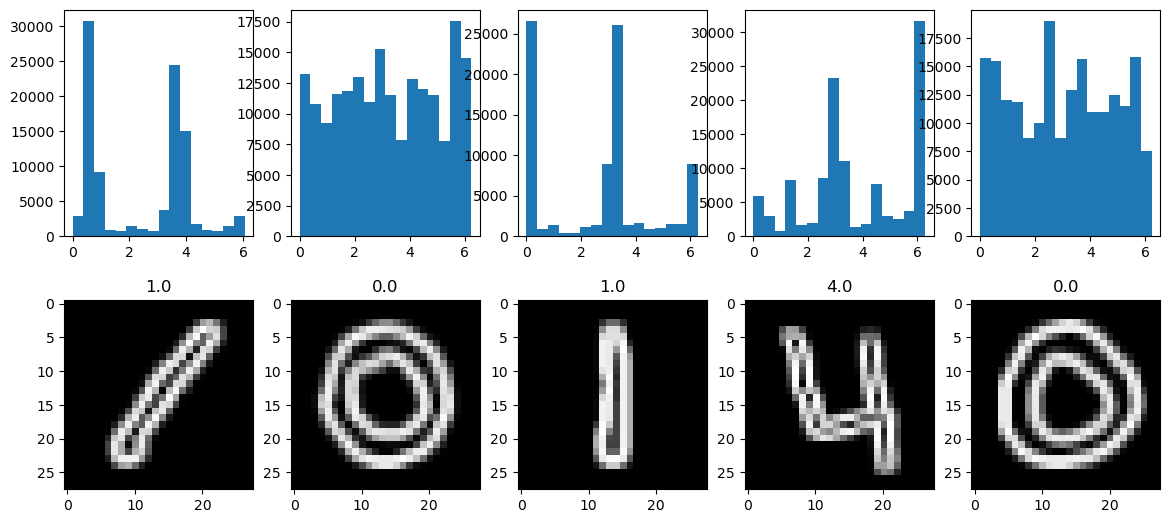

In [53]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

### Вычисляем гистограммы градиентов

In [54]:
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [55]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

### Нормируем вектор гистограммы

In [56]:
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

### Разбиваем выборку на обучение и валидацию

In [57]:
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=42)